# Part 1 - Momentum

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
from pandas.tseries.offsets import MonthEnd
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv(r"C:\Users\e0348704\OneDrive - National University of Singapore\Semester- 3\Tech Disruptions\Assignment 2\SP500_total_return.csv", index_col=0)
data.head()

,LYB UN Equity,AXP UN Equity,VZ UN Equity,AVGO UW Equity,BA UN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,ABBV UN Equity,...,ILMN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
9/30/1998,NaN,-0.480769,9.773371,NaN,10.909090,5.629630,-18.39623,13.502110,-11.303950,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/31/1998,NaN,14.199530,10.505380,NaN,9.289618,1.622921,32.44237,-3.048327,17.353580,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/30/1998,NaN,13.224890,4.705883,NaN,8.701568,9.861111,11.66117,3.384280,3.821220,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/31/1998,NaN,2.186134,-4.719101,NaN,-19.692310,-6.953224,7.29064,-0.822123,-4.549510,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/31/1999,NaN,0.828916,13.982390,NaN,5.938697,-5.248493,13.60567,-9.871891,-2.149533,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data = data/100
data.head()

,LYB UN Equity,AXP UN Equity,VZ UN Equity,AVGO UW Equity,BA UN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,ABBV UN Equity,...,ILMN UW Equity,ADS UN Equity,LKQ UW Equity,NLSN UN Equity,GRMN UW Equity,XEC UN Equity,ZTS UN Equity,DLR UN Equity,EQIX UW Equity,DISCK UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
1998-09-30,NaN,-0.004808,0.097734,NaN,0.109091,0.056296,-0.183962,0.135021,-0.113040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-10-31,NaN,0.141995,0.105054,NaN,0.092896,0.016229,0.324424,-0.030483,0.173536,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-11-30,NaN,0.132249,0.047059,NaN,0.087016,0.098611,0.116612,0.033843,0.038212,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-31,NaN,0.021861,-0.047191,NaN,-0.196923,-0.069532,0.072906,-0.008221,-0.045495,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-31,NaN,0.008289,0.139824,NaN,0.059387,-0.052485,0.136057,-0.098719,-0.021495,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
port_ret=pd.DataFrame()
for j in range(9,240,3):
    ret_ji= data.iloc[j-9:j]
    ret_jy= (1+ret_ji).prod()-1
    quantile=pd.qcut(ret_jy.rank(method='first'),3,labels=False)
    ret_jy_df= pd.DataFrame([ret_jy,quantile], index =['Return','Quantile'])
    ret_jy_df=ret_jy_df.T
    #short_port=ret_jy_df.index[ret_jy_df.Quantile==0]
    long_port=ret_jy_df.index[ret_jy_df.Quantile==2]
    k=3
    for l in range(k):
            long_ret=data[long_port].iloc[j+l].mean()
            #short_ret=data[short_port].iloc[j+l].mean()
            #long_short_ret=long_ret-short_ret
            currentdate = data.iloc[[j+l]].index.astype(str)
            port_ret=port_ret.append(pd.DataFrame({'date': currentdate, 'long_ret': long_ret}), ignore_index=True)

In [6]:
port_ret=port_ret.set_index('date')
port_ret.head()

,long_ret
date,
1999-06-30,0.072356
1999-07-31,-0.024957
1999-08-31,-0.015925
1999-09-30,-0.014978
1999-10-31,0.048022


In [7]:
port_ret_ls=pd.DataFrame()
for j in range(9,240,3):
    ret_ji_ls= data.iloc[j-9:j]
    ret_jy_ls= (1+ret_ji_ls).prod()-1
    quantile=pd.qcut(ret_jy_ls.rank(method='first'),3,labels=False)
    ret_jy_ls_df= pd.DataFrame([ret_jy_ls,quantile], index =['Return','Quantile'])
    ret_jy_ls_df=ret_jy_ls_df.T
    short_port_ls=ret_jy_ls_df.index[ret_jy_ls_df.Quantile==0]
    long_port_ls=ret_jy_ls_df.index[ret_jy_ls_df.Quantile==2]
    k=3
    for l in range(k):
            long_ret_ls=data[long_port_ls].iloc[j+l].mean()
            short_ret_ls=data[short_port_ls].iloc[j+l].mean()
            ls_ret=long_ret_ls-short_ret_ls
            currentdate_ls = data.iloc[[j+l]].index.astype(str)
            port_ret_ls=port_ret_ls.append(pd.DataFrame({'date': currentdate_ls, 'ls_ret': ls_ret}), ignore_index=True)    

In [8]:
port_ret_ls=port_ret_ls.set_index('date')
port_ret_ls.head()

,ls_ret
date,
1999-06-30,-0.005423
1999-07-31,0.005176
1999-08-31,-0.014354
1999-09-30,0.036080
1999-10-31,0.033694


In [9]:
MRet = pd.concat([port_ret,port_ret_ls['ls_ret']],axis = 1)
MRet.head()

,long_ret,ls_ret
date,,
1999-06-30,0.072356,-0.005423
1999-07-31,-0.024957,0.005176
1999-08-31,-0.015925,-0.014354
1999-09-30,-0.014978,0.036080
1999-10-31,0.048022,0.033694


In [10]:
FF5= pd.read_csv('https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_CSV.zip',skiprows = range(3), index_col = 0)
#FF5.head()

In [11]:
FF5= FF5.loc['199906':'201808']

In [12]:
FF5.index=pd.to_datetime(FF5.index.astype(str), format='%Y%m') + MonthEnd (1)

In [13]:
FF5['Mkt-RF'] = FF5['Mkt-RF'].astype(float)
FF5['SMB'] = FF5['SMB'].astype(float)
FF5['HML'] = FF5['HML'].astype(float)
FF5['RMW'] = FF5['RMW'].astype(float)
FF5['CMA'] = FF5['CMA'].astype(float)
FF5['RF'] = FF5['RF'].astype(float)

In [14]:
FF5=FF5/100

In [15]:
FF5.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
1999-06-30,0.0477,0.0225,-0.0360,0.0132,-0.0337,0.0040
1999-07-31,-0.0349,0.0253,-0.0076,0.0048,0.0311,0.0038
1999-08-31,-0.0138,-0.0193,-0.0131,-0.0029,0.0031,0.0039
1999-09-30,-0.0279,0.0256,-0.0340,-0.0074,-0.0106,0.0039
1999-10-31,0.0612,-0.0709,-0.0288,-0.0171,-0.0125,0.0039


In [16]:
FF5.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,0.005086,0.004048,0.001414,0.003651,0.002514,0.001396
std,0.043100,0.031502,0.032233,0.030205,0.021101,0.001607
min,-0.172300,-0.149100,-0.111800,-0.183300,-0.065500,0.000000
25%,-0.019650,-0.013700,-0.013800,-0.009800,-0.010600,0.000100
50%,0.010600,0.002900,-0.001200,0.002800,-0.000100,0.000800
75%,0.032250,0.024600,0.017250,0.013750,0.012150,0.002400
max,0.113500,0.183200,0.128700,0.133300,0.095600,0.005600


In [17]:
AllData = pd.concat([MRet['long_ret'],MRet['ls_ret'],FF5], axis =1)
AllData.head()

,long_ret,ls_ret,Mkt-RF,SMB,HML,RMW,CMA,RF
1999-06-30,0.072356,-0.005423,0.0477,0.0225,-0.0360,0.0132,-0.0337,0.0040
1999-07-31,-0.024957,0.005176,-0.0349,0.0253,-0.0076,0.0048,0.0311,0.0038
1999-08-31,-0.015925,-0.014354,-0.0138,-0.0193,-0.0131,-0.0029,0.0031,0.0039
1999-09-30,-0.014978,0.036080,-0.0279,0.0256,-0.0340,-0.0074,-0.0106,0.0039
1999-10-31,0.048022,0.033694,0.0612,-0.0709,-0.0288,-0.0171,-0.0125,0.0039


In [18]:
AllData['excess_long']= AllData['long_ret'] - AllData['RF']
AllData['excess_ls']= AllData['ls_ret'] - AllData['RF']

In [19]:
AllData.head()

,long_ret,ls_ret,Mkt-RF,SMB,HML,RMW,CMA,RF,excess_long,excess_ls
1999-06-30,0.072356,-0.005423,0.0477,0.0225,-0.0360,0.0132,-0.0337,0.0040,0.068356,-0.009423
1999-07-31,-0.024957,0.005176,-0.0349,0.0253,-0.0076,0.0048,0.0311,0.0038,-0.028757,0.001376
1999-08-31,-0.015925,-0.014354,-0.0138,-0.0193,-0.0131,-0.0029,0.0031,0.0039,-0.019825,-0.018254
1999-09-30,-0.014978,0.036080,-0.0279,0.0256,-0.0340,-0.0074,-0.0106,0.0039,-0.018878,0.032180
1999-10-31,0.048022,0.033694,0.0612,-0.0709,-0.0288,-0.0171,-0.0125,0.0039,0.044122,0.029794


In [20]:
x= AllData[['Mkt-RF','SMB','HML','RMW','CMA']]
x=sm.add_constant(x)
y= AllData['excess_long']
ff5_long=sm.OLS(y,x).fit().summary() #use .params or .tvalues if specific needed
print(ff5_long)

                            OLS Regression Results                            
Dep. Variable:            excess_long   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     205.2
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           1.04e-81
Time:                        15:43:05   Log-Likelihood:                 601.20
No. Observations:                 231   AIC:                            -1190.
Df Residuals:                     225   BIC:                            -1170.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.001      3.717      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
x= AllData[['Mkt-RF','SMB','HML','RMW','CMA']]
x=sm.add_constant(x)
y= AllData['excess_ls']
ff5_ls=sm.OLS(y,x).fit().summary()
print(ff5_ls)

                            OLS Regression Results                            
Dep. Variable:              excess_ls   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     9.799
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           1.74e-08
Time:                        15:43:05   Log-Likelihood:                 417.11
No. Observations:                 231   AIC:                            -822.2
Df Residuals:                     225   BIC:                            -801.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025      0.003     -0.866      0.3

In [22]:
time1_long=port_ret.loc['1999-08-31':'1999-11-30']
time2_long=port_ret.loc['2009-03-31':'2009-06-30']
time3_long=port_ret.loc['2018-01-31':'2018-03-31']

In [23]:
time1_long

,long_ret
date,
1999-08-31,-0.015925
1999-09-30,-0.014978
1999-10-31,0.048022
1999-11-30,0.046506


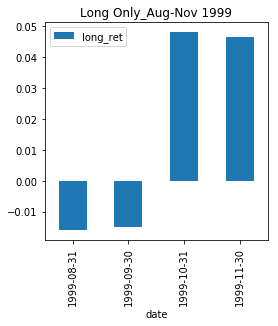

In [24]:
time1_long.plot(kind='bar', figsize=(4,4), title = 'Long Only_Aug-Nov 1999')

In [25]:
time1_CUM=(1+time1_long['long_ret']).prod()-1
time1_CUM

0.06312901026205342

In [26]:
time2_long

,long_ret
date,
2009-03-31,0.057222
2009-04-30,0.022940
2009-05-31,0.011096
2009-06-30,-0.003243


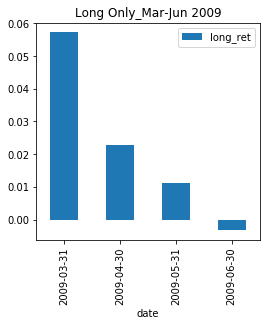

In [27]:
time2_long.plot(kind='bar', figsize=(4,4), title = 'Long Only_Mar-Jun 2009')

In [28]:
time2_CUM=(1+time2_long['long_ret']).prod()-1
time2_CUM

0.08992849727575192

In [29]:
time3_long

,long_ret
date,
2018-01-31,0.069452
2018-02-28,-0.029207
2018-03-31,-0.010511


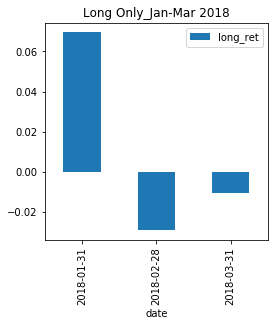

In [30]:
time3_long.plot(kind='bar', figsize=(4,4), title = 'Long Only_Jan-Mar 2018')

In [31]:
time3_CUM=(1+time3_long['long_ret']).prod()-1
time3_CUM

0.027303497695108314

In [32]:
time1_ls=port_ret_ls.loc['1999-08-31':'1999-11-30']
time2_ls=port_ret_ls.loc['2009-03-31':'2009-06-30']
time3_ls=port_ret_ls.loc['2018-01-31':'2018-03-31']

In [33]:
time1_ls

,ls_ret
date,
1999-08-31,-0.014354
1999-09-30,0.036080
1999-10-31,0.033694
1999-11-30,0.043582


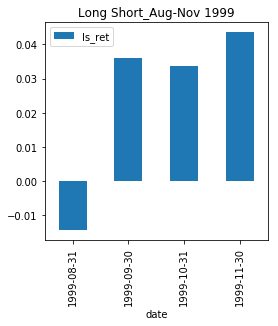

In [34]:
time1_ls.plot(kind='bar', figsize=(4,4), title = 'Long Short_Aug-Nov 1999')

In [35]:
time1_CUM_ls=(1+time1_ls['ls_ret']).prod()-1
time1_CUM_ls

0.10162321811579833

In [36]:
time2_ls

,ls_ret
date,
2009-03-31,-0.074708
2009-04-30,-0.309855
2009-05-31,-0.076641
2009-06-30,0.005875


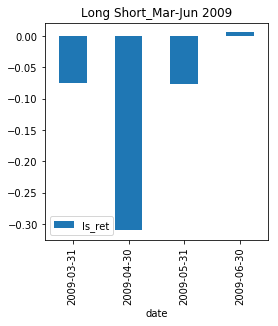

In [37]:
time2_ls.plot(kind='bar', figsize=(4,4), title = 'Long Short_Mar-Jun 2009')

In [38]:
time2_CUM_ls=(1+time2_ls['ls_ret']).prod()-1
time2_CUM_ls

-0.40689234917069717

In [39]:
time3_ls

,ls_ret
date,
2018-01-31,0.037789
2018-02-28,0.031805
2018-03-31,-0.007698


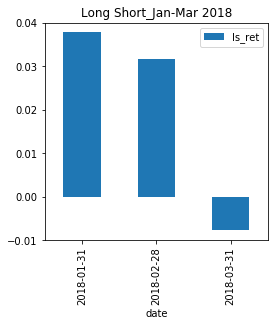

In [40]:
time3_ls.plot(kind='bar', figsize=(4,4), title = 'Long Short_Jan-Mar 2018')

In [41]:
time3_CUM_ls=(1+time3_ls['ls_ret']).prod()-1
time3_CUM_ls

0.06255315749308887

In [42]:
two_chart_input=[['Aug-Nov 1999',time1_CUM,time1_CUM_ls],['Mar-Jun 2009',time2_CUM,time2_CUM_ls],['Jan-Mar 2018',time3_CUM,time3_CUM_ls]]
two_chart=pd.DataFrame(two_chart_input,columns=['Time_Period','Long_Only','Long_Short'])

In [43]:
two_chart=two_chart.set_index('Time_Period')
two_chart

,Long_Only,Long_Short
Time_Period,,
Aug-Nov 1999,0.063129,0.101623
Mar-Jun 2009,0.089928,-0.406892
Jan-Mar 2018,0.027303,0.062553


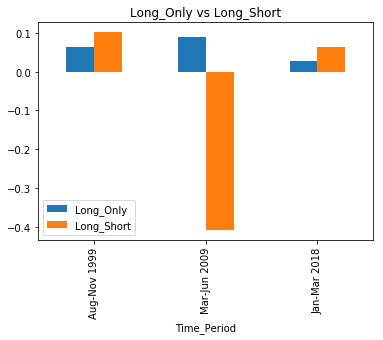

In [44]:
two_chart.plot(kind='bar', title = 'Long_Only vs Long_Short' )

# Part 2 - Credit Scoring

In [45]:
df=pd.read_pickle('mortgage.pkl')
df.head()

,id,time,gdp,FICO,LTV,default
0,1,25,2.899137,715,69.4,0
1,1,26,2.151365,715,69.4,0
2,1,27,2.361722,715,69.4,0
3,1,28,1.229172,715,69.4,0
4,1,29,1.692969,715,69.4,0


In [46]:
df.shape

(622489, 6)

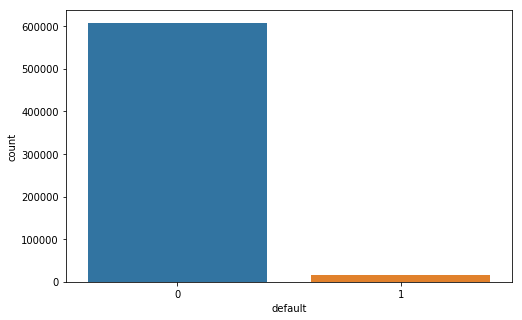

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x='default',data=df)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 6 columns):
id         622489 non-null int64
time       622489 non-null int64
gdp        622489 non-null float64
FICO       622489 non-null int64
LTV        622489 non-null float64
default    622489 non-null int64
dtypes: float64(2), int64(4)
memory usage: 28.5 MB


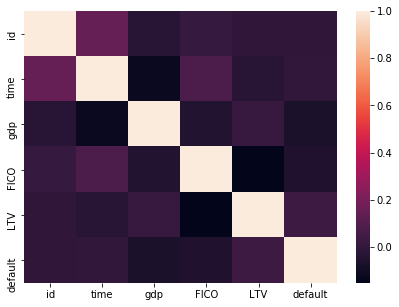

In [50]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr())

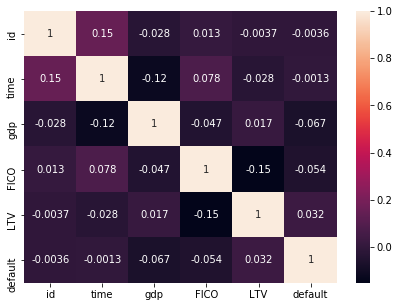

In [51]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True)

In [52]:
model=smf.logit(formula='default ~ id + time + gdp + FICO + LTV',data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.110688
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:               622489
Model:                          Logit   Df Residuals:                   622483
Method:                           MLE   Df Model:                            5
Date:                Sat, 12 Oct 2019   Pseudo R-squ.:                 0.03346
Time:                        15:43:10   Log-Likelihood:                -68902.
converged:                       True   LL-Null:                       -71287.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5739      0.109    -14.424      0.000      -1.788      -1.360
id         -2.342e-06   5.86e-07     -3.996      0.000   -3.49e-06   -1.19e-06
time          -0.0015      0.001     -1.932      0.053      -0.003    2.25e-05
gdp           -0.1850      0.003    -54.179      0.000      -0.192      -0.178
FICO          -0.0047      0.000    -41.594      0.000      -0.005      -0.005
LTV            0.0166      0.001     20.112      0.000       0.015       0.018
==============================================================================
"""

In [54]:
# drop time
model2=smf.logit(formula='default ~ id + gdp + FICO + LTV',data=df).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.110691
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:               622489
Model:                          Logit   Df Residuals:                   622484
Method:                           MLE   Df Model:                            4
Date:                Sat, 12 Oct 2019   Pseudo R-squ.:                 0.03343
Time:                        15:43:13   Log-Likelihood:                -68904.
converged:                       True   LL-Null:                       -71287.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6152      0.107    -15.088      0.000      -1.825      -1.405
id         -2.534e-06   5.77e-07     -4.391      0.000   -3.67e-06    -1.4e-06
gdp           -0.1844      0.003    -54.198      0.000      -0.191      -0.178
FICO          -0.0048      0.000    -41.842      0.000      -0.005      -0.005
LTV            0.0166      0.001     20.128      0.000       0.015       0.018
==============================================================================
"""

In [56]:
predicted =  model2.predict()
predicted

array([0.01206968, 0.0138293 , 0.01331019, ..., 0.01703686, 0.01839988,
       0.01713669])

In [57]:
logit_pred = model2.predict()
i=0
for x in model2.predict():
    if x<0.5:
        logit_pred[i]=0
    else:
        logit_pred[i]=1
    i=i+1

In [58]:
np.mean(logit_pred==df['default'])
# model seems to predict 97.5% accurately

0.9756493689045108

In [59]:
model2.pred_table()

array([[607331.,      0.],
       [ 15158.,      0.]])

In [61]:
model3=smf.logit(formula='default ~ gdp + FICO + LTV',data=df).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.110706
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:               622489
Model:                          Logit   Df Residuals:                   622485
Method:                           MLE   Df Model:                            3
Date:                Sat, 12 Oct 2019   Pseudo R-squ.:                 0.03329
Time:                        15:43:16   Log-Likelihood:                -68913.
converged:                       True   LL-Null:                       -71287.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6761      0.106    -15.780      0.000      -1.884      -1.468
gdp           -0.1839      0.003    -54.062      0.000      -0.191      -0.177
FICO          -0.0048      0.000    -41.816      0.000      -0.005      -0.005
LTV            0.0165      0.001     20.058      0.000       0.015       0.018
==============================================================================
"""